In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_absolute_error

In [ ]:
churn = pd.read_csv('Churn.csv')

In [ ]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#churn['PhoneService'].value_counts()
churn_1 = churn.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1)

In [ ]:
churn_1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
#churn_1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
churn_1['MultipleLines'] = churn_1['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
churn_1['OnlineSecurity'] = churn_1['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_1['OnlineBackup'] = churn_1['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_1['DeviceProtection'] = churn_1['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_1['TechSupport'] = churn_1['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_1['StreamingTV'] = churn_1['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_1['StreamingMovies'] = churn_1['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})

In [ ]:
churn_1['Contract'] = churn_1['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
churn_1['InternetService'] = churn_1['InternetService'].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})

In [ ]:
churn_1 = pd.get_dummies(data= churn_1,columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling'],drop_first=True)
churn_1 = pd.get_dummies(data = churn_1, columns=['Churn'],drop_first=True)

AFTER ALL THE CHANGES

In [ ]:
churn_1.head(3)

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,0,1,2,2,0,1,0,0,0,0,0,Electronic check,0,1,0,0,1,0
1,0,34,0,2,1,0,1,0,0,0,1,Mailed check,1,0,0,1,0,0
2,0,2,0,2,1,1,0,0,0,0,0,Mailed check,1,0,0,1,1,1


**Differentiating features and labels**

In [ ]:
# X = features
# Y = label
X = churn_1.drop(['Churn_Yes'], axis=1)
Y = churn_1['Churn_Yes']

In [ ]:
X.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,1,2,2,0,1,0,0,0,0,0,Electronic check,0,1,0,0,1
1,0,34,0,2,1,0,1,0,0,0,1,Mailed check,1,0,0,1,0
2,0,2,0,2,1,1,0,0,0,0,0,Mailed check,1,0,0,1,1
3,0,45,2,2,1,0,1,1,0,0,1,Bank transfer (automatic),1,0,0,0,0
4,0,2,0,1,0,0,0,0,0,0,0,Electronic check,0,0,0,1,1


In [ ]:
churn_1.corr()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.099883,0.032310,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889
tenure,0.016567,1.000000,0.242279,0.030359,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229
MultipleLines,0.099883,0.242279,1.000000,0.340949,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,-0.000485,0.090981,-0.016875,-0.691070,0.108230,0.019423
InternetService,0.032310,0.030359,0.340949,1.000000,-0.607788,-0.658287,-0.662957,-0.609795,-0.712890,-0.709020,-0.099721,0.000863,-0.000891,-0.044590,-0.387436,0.138625,0.047291
OnlineSecurity,-0.210897,0.145298,-0.235021,-0.607788,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.003429,0.081850,0.190523,0.125353,-0.334003,-0.332819
OnlineBackup,-0.152780,0.178651,-0.210372,-0.658287,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.002032,0.087055,0.162445,0.150338,-0.262402,-0.291449
DeviceProtection,-0.157095,0.178649,-0.200463,-0.662957,0.749040,0.740604,1.000000,0.767970,0.763279,0.766821,0.390216,0.005092,0.094451,0.156439,0.138755,-0.276326,-0.281465
TechSupport,-0.223770,0.144459,-0.232155,-0.609795,0.791225,0.754095,0.767970,1.000000,0.737578,0.737123,0.418440,0.000985,0.069072,0.180832,0.123350,-0.310749,-0.329852
StreamingTV,-0.130130,0.136145,-0.202414,-0.712890,0.701976,0.720671,0.763279,0.737578,1.000000,0.809608,0.327951,0.001156,0.080127,0.140395,0.171538,-0.203907,-0.205742
StreamingMovies,-0.120802,0.140781,-0.195815,-0.709020,0.704984,0.716700,0.766821,0.737123,0.809608,1.000000,0.330993,-0.000191,0.075779,0.125820,0.165205,-0.211818,-0.207256


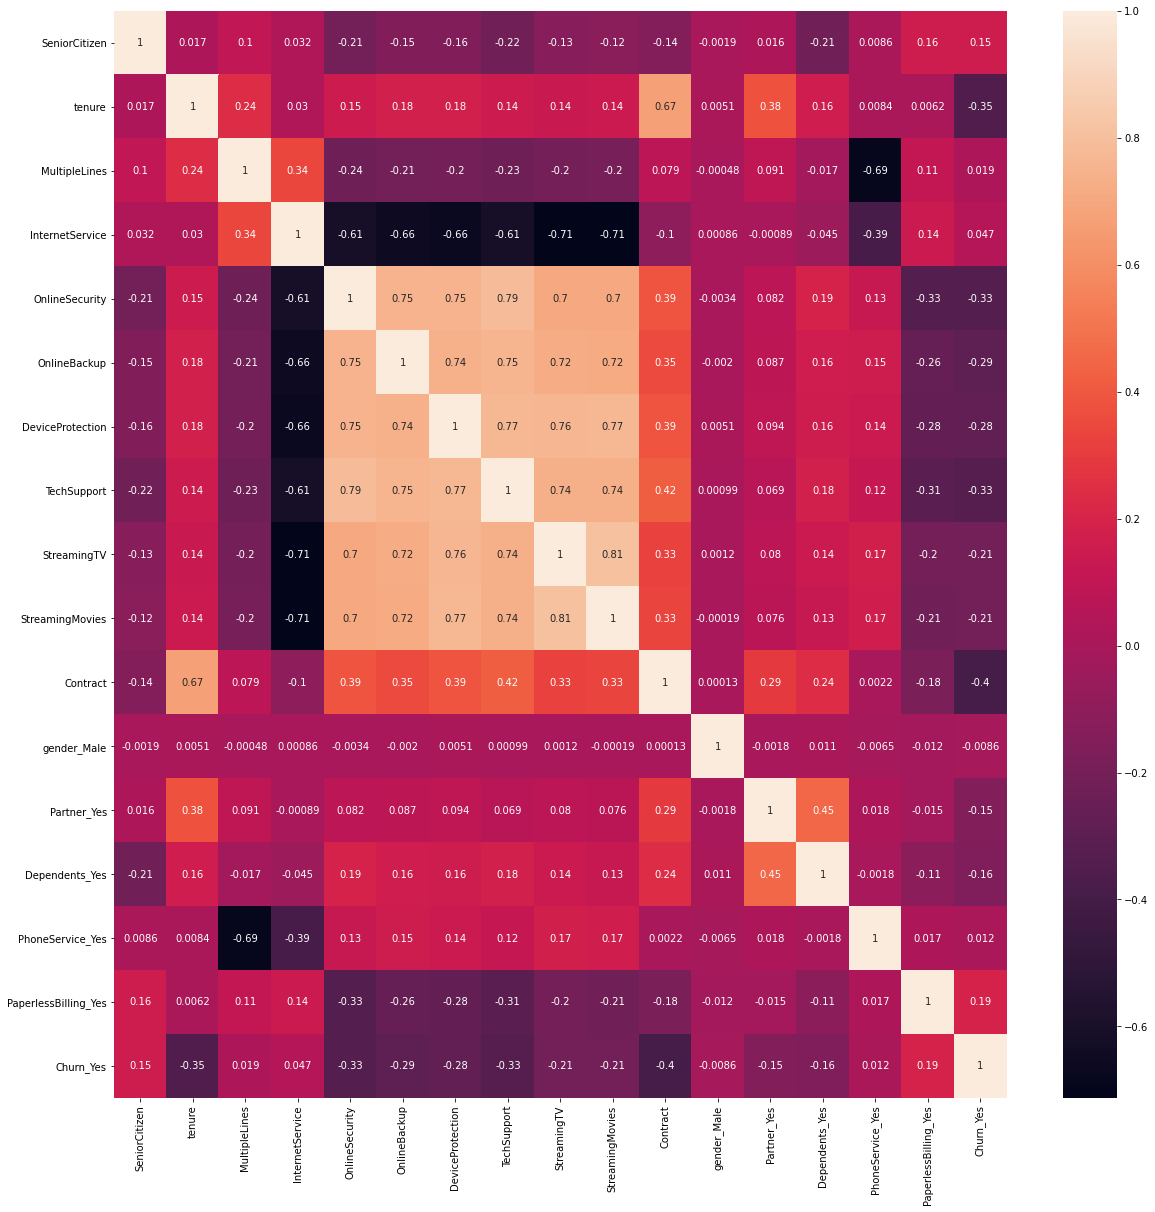

In [ ]:
C_M = churn_1.corr()
plt.figure(figsize=(20,20))
sn.heatmap(C_M, annot= True)
plt.show()

In [ ]:
churn_2  = churn_1.drop(columns=['MultipleLines','InternetService','gender_Male','PhoneService_Yes'],axis=1)
churn_2  = churn_2.drop(columns=['SeniorCitizen','Partner_Yes','Dependents_Yes','PaperlessBilling_Yes'],axis=1)
churn_2  = churn_2.drop(columns=['PaymentMethod'],axis=1)

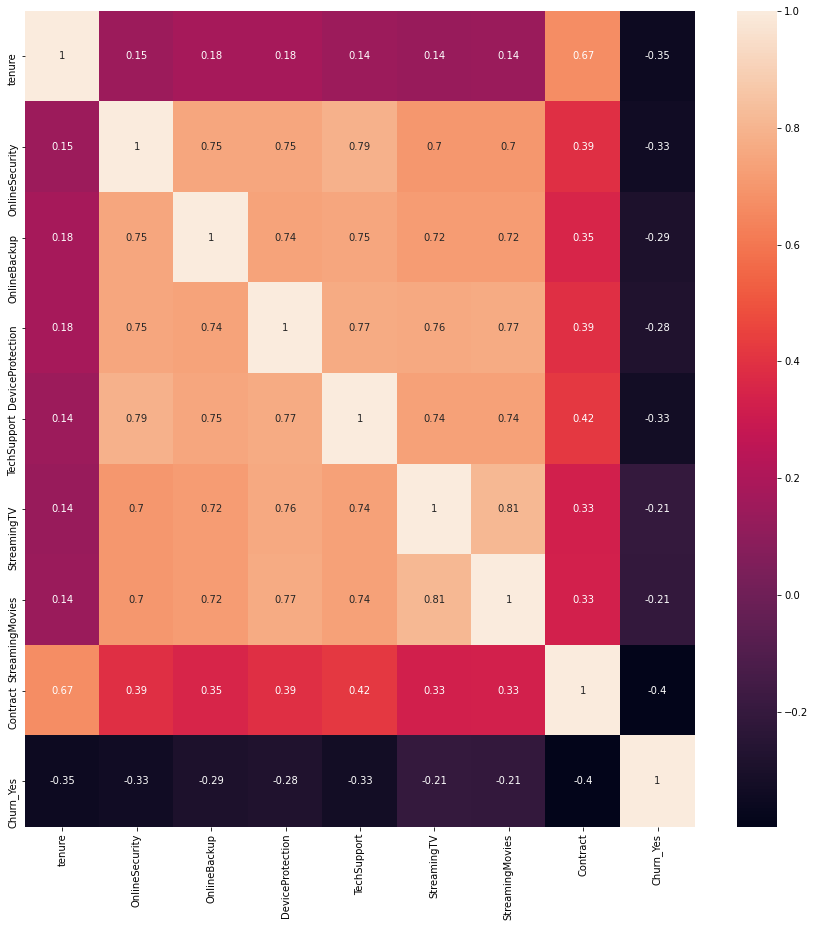

In [ ]:
C_M = churn_2.corr()
plt.figure(figsize=(15,15))
sn.heatmap(C_M, annot=True)
plt.show()

In [ ]:
X = churn_2.drop(['Churn_Yes'], axis=1)
Y = churn_2['Churn_Yes']

In [ ]:
X['tenure'] = X['tenure'] / X['tenure'].max()
X.head(5)

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,0.013889,0,1,0,0,0,0,0
1,0.472222,1,0,1,0,0,0,1
2,0.027778,1,1,0,0,0,0,0
3,0.625000,1,0,1,1,0,0,1
4,0.027778,0,0,0,0,0,0,0


In [ ]:
#5174+1869

7043

In [ ]:
#Y.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

K NEAREST NEIGHBOUR CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split
tr_rs = []
ts_rs = []
for i in range(1,15):
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=i)

  from sklearn.neighbors import KNeighborsClassifier
  kmodel = KNeighborsClassifier(n_neighbors=5)

  kmodel.fit(xtrain,ytrain)

  ytrain_p = kmodel.predict(xtrain)
  tr_rs.append((ytrain_p == ytrain).sum()/len(xtrain))

  ytest_p = kmodel.predict(xtest)
  ts_rs.append((ytest_p == ytest).sum()/len(xtest))


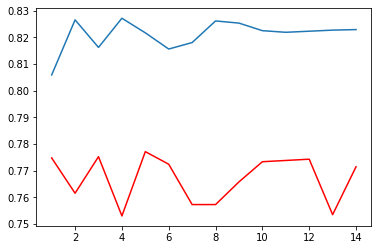

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),tr_rs)
plt.plot(range(1,15),ts_rs,c='red')
plt.show()

In [ ]:
tr_acc = []
ts_acc = []
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=3)
for i in range(1,25):
  from sklearn.neighbors import KNeighborsClassifier
  kmodel = KNeighborsClassifier(n_neighbors = i)

  kmodel.fit(xtrain,ytrain)

  ytrain_p = kmodel.predict(xtrain)
  tr_acc.append((ytrain_p == ytrain).sum()/len(xtrain))

  ytest_p = kmodel.predict(xtest)
  ts_acc.append((ytest_p == ytest).sum()/len(xtest))

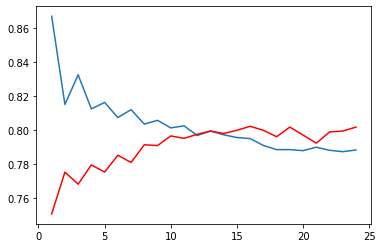

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,25),tr_acc)
plt.plot(range(1,25),ts_acc,c='red')
plt.show()

In [ ]:
kmodel = KNeighborsClassifier(n_neighbors = 10)

kmodel.fit(xtrain,ytrain)

ytrain_p = kmodel.predict(xtrain)
print((ytrain_p == ytrain).sum()/len(xtrain))

ytest_p = kmodel.predict(xtest)
print((ytest_p == ytest).sum()/len(xtest))

0.8012170385395537
0.79649787032655


In [ ]:
print(mean_absolute_error(ytrain_p,ytrain))
print(mean_absolute_error(ytest_p,ytest))
#print(kmodel.score(xtrain,ytrain))

13.645841784989859
15.469947941315665


NAIVE BAYES METHOD (MULTIMONIAL) 

In [ ]:
tr_acc = []
ts_acc = []
from sklearn.naive_bayes import MultinomialNB
mmodel = MultinomialNB()
for i in range(1,15): 
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=i)
  mmodel.fit(xtrain, ytrain) 

  ytrain_p = mmodel.predict(xtrain)
  tr_acc.append((ytrain_p == ytrain).sum()/len(xtrain))

  ytest_p = mmodel.predict(xtest)
  ts_acc.append((ytest_p == ytest).sum()/len(xtest))

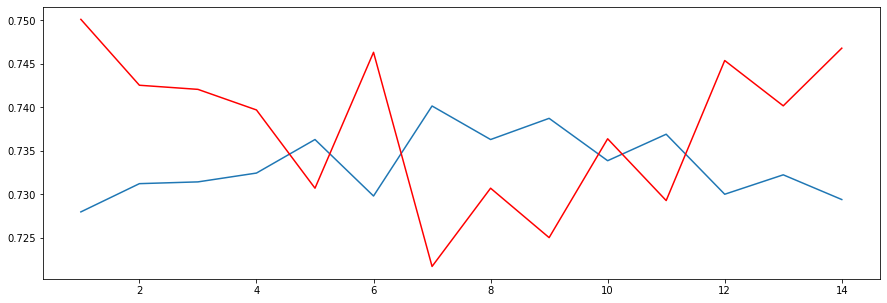

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1,15),tr_acc)
plt.plot(range(1,15),ts_acc,c='red')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mmodel = MultinomialNB()


xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=5)
mmodel.fit(xtrain, ytrain) 

ytrain_p = mmodel.predict(xtrain)
print((ytrain_p == ytrain).sum()/len(xtrain))

ytest_p = mmodel.predict(xtest)
print((ytest_p == ytest).sum()/len(xtest))

0.7363083164300203
0.7307146237576905


In [ ]:
print(mean_absolute_error(ytrain_p,ytrain))
print(mean_absolute_error(ytest_p,ytest))

0.26369168356997974
0.2692853762423095


RANDOM FOREST CLASSIFICATION

In [ ]:
tr_acc = []
ts_acc = []
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=5, random_state=2)
for i in range(1,15): 
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=i)
  rmodel.fit(xtrain, ytrain) 

  ytrain_p = rmodel.predict(xtrain)
  tr_acc.append((ytrain_p == ytrain).sum()/len(xtrain))

  ytest_p = rmodel.predict(xtest)
  ts_acc.append((ytest_p == ytest).sum()/len(xtest))

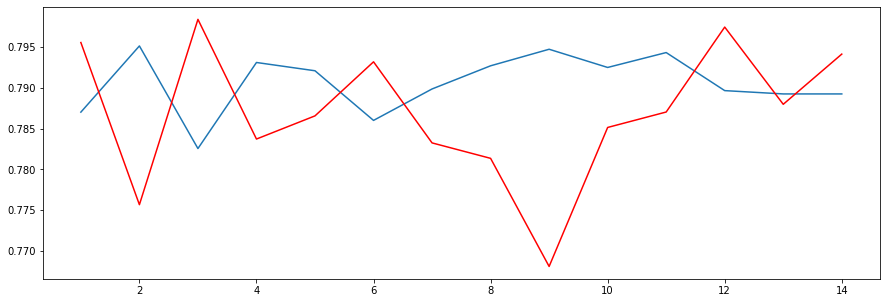

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1,15),tr_acc)
plt.plot(range(1,15),ts_acc,c='red')
plt.show()

In [ ]:
#for i in range(1,15):
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(random_state=2, max_depth=5)

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=5)
rmodel.fit(xtrain, ytrain) 

ytrain_p = rmodel.predict(xtrain)
print((ytrain_p == ytrain).sum()/len(xtrain))

ytest_p = rmodel.predict(xtest)
print((ytest_p == ytest).sum()/len(xtest))

print(mean_absolute_error(ytrain_p,ytrain))
print(mean_absolute_error(ytest_p,ytest))

0.7920892494929006
0.7865593942262187
13.60344827586207
13.676762896355893


**ANALYSING THE ALGORITHMS**

1) PREDICTION % 

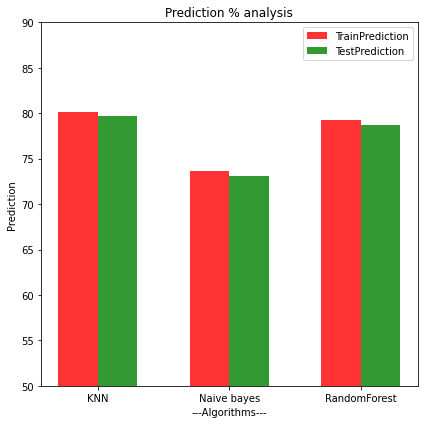

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 3
train_Pred = ( 80.12170385395537, 73.63083164300203, 79.20892494929006)
test_Pred = (79.649787032655 ,73.07146237576905, 78.65593942262187)

fig, ax = plt.subplots(figsize=(6,6))
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

rects1 = plt.bar(index, train_Pred, bar_width, alpha=opacity, color='r', label='TrainPrediction')

rects2 = plt.bar(index + bar_width, test_Pred, bar_width, alpha=opacity, color='g', label='TestPrediction')

plt.xlabel('---Algorithms---')
plt.ylabel('Prediction')
plt.ylim(50,90)
plt.title('Prediction % analysis')
plt.xticks(index + bar_width/2, ('KNN', 'Naive bayes', 'RandomForest'))
plt.legend()

plt.tight_layout()
plt.show()

2) ERROR %


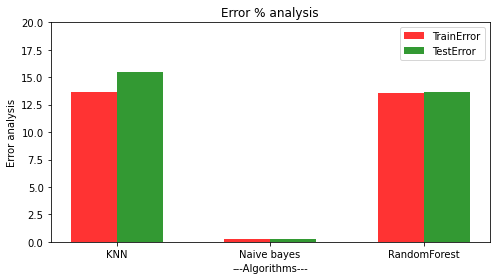

In [3]:
n_groups = 3
train_Pred = ( 13.645841784989859, 0.26369168356997974, 13.60344827586207)
test_Pred = (15.469947941315665, 0.2692853762423095, 13.676762896355893)

fig, ax = plt.subplots(figsize=(7,4))
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

rects1 = plt.bar(index, train_Pred, bar_width, alpha=opacity, color='r', label='TrainError')

rects2 = plt.bar(index + bar_width, test_Pred, bar_width, alpha=opacity, color='g', label='TestError')

plt.xlabel('---Algorithms---')
plt.ylabel('Error analysis')
plt.ylim(0,20)
plt.title('Error % analysis')
plt.xticks(index + bar_width/2, ('KNN', 'Naive bayes', 'RandomForest'))
plt.legend()
plt.tight_layout()
plt.show()